Before we get started making fun games and stuff, this looks different from Trinket, doesn't it? The tool we're using now is called Jupyter Notebook. Here, your code is organized into chunks called "cells" which can be run independently of one another. Your variables are stored after you run a cell, so you can re-use them in the next cell. This lets you work with the code more interactively.

First, let's try running some code. Click to the left of the cell with the print statement in it (it should turn blue), and then press Shift + Enter to run it. 

In [ ]:
print('This is a cell!')

Some other things you might want to do in a Jupyter Notebook (select the cell by clicking to the left of it first):
- Add a new cell: press a (add above the current cell) or b (add below the current cell)
- Delete the selected cell: press d twice
- Save your code at the end of a session! Your code won't be saved on the server, so you need to download the file and then re-upload it next time. Click <b>File>Download as>Notebook (.ipynb)</b>. 

If you want to learn more tricks for using Jupyter Notebooks later, there's a tutorial [here](https://hub.mybinder.org/user/jvns-pandas-cookbook-zcq5n6op/notebooks/cookbook/A%20quick%20tour%20of%20IPython%20Notebook.ipynb). For now, we've got some code written below to make the game Connect 4. We use a few things here that we haven't talked about before, but don't panic! With the person next to you, try to answer the following questions (you don’t need to write anything down, just be able to explain it to one another!):
- Can you explain what the <b>functions</b> drop_piece() and four_in_a_row() do? What are their inputs and outputs?
- We use <b>if statements</b> in 3 different places in the program. What conditions are we checking for, and what do we do if the conditions are met?
- We use a <b>for loop</b> in the function four_in_a_row(). What does this do? What does it mean that we have a for loop inside of another for loop?
- We use 2 <b>while loops</b> in this program. Where are they and what are they doing?
- What are some examples of <b>variables</b> used in this program?

When you've finished going through the code, think about what the differences are between Connect 4 and tic tac toe. How do these differences map onto the code you've been looking at? What parts of the code would you need to change if you wanted to make tic tac toe?

...Now try it! Using our code as a starting point, can you make a working version of tic tac toe?


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [230]:
def drop_piece(board, column):
    row = board.shape[0] - 1
    dropped = False
    while (row >= 0) & (not dropped):
        if board[row, column] == 0:
            board[row, column] = player_number
            dropped = True
        else:
            row = row - 1
    return board, row, dropped

def four_in_a_row(board, row, column):
    
    # Get a list of horizontal, vertical, and diagonal lines involving the piece that was just added
    lines = []

    # Horizontal & vertical
    lines.append(board[:, column])
    lines.append(board[row])
    
    # Diagonal
    w = board.shape[1] - 1
    h = board.shape[0] - 1        
    distance_to_left = min([row, column]) * -1
    distance_to_right = min([h - row, w - column]) + 1    
    lines.append([board[row + n, column + n] for n in range(distance_to_left, distance_to_right)])    
    distance_to_left = min([row, w - column]) * -1
    distance_to_right = min([h - row, column]) + 1
    lines.append([board[row + n, column - n] for n in range(distance_to_left, distance_to_right)])

    # Split each list into chunks of four and check each to see if all values are a) the same and b) not zero
    fours = []
    for line in lines:
        for n in range(len(line) - 3):
            four = line[n:n+4]
            if (four[0] == four).all() & (four[0] != 0):
                return True
    return False

def show_board(board):
    plt.imshow(board, vmin = 0, vmax = 2)
    for i in range(board.shape[0]):
        for j in range(board.shape[1]):
            text = plt.gca().text(j, i, board[i, j],
                           ha="center", va="center", color="w")
    plt.gca().set_yticks([])
    plt.show()

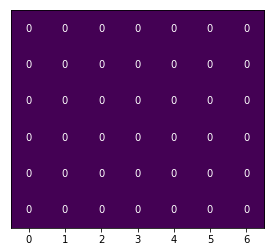

Player 1, pick a column!
0


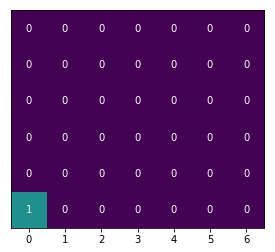

Player 2, pick a column!
0


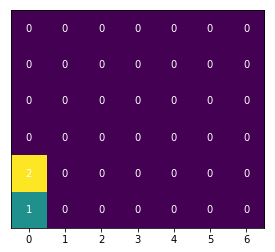

Player 1, pick a column!
1


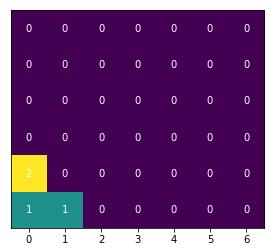

Player 2, pick a column!
1


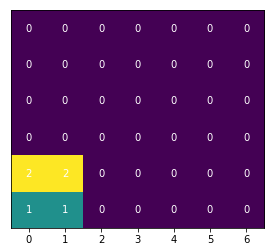

Player 1, pick a column!
2


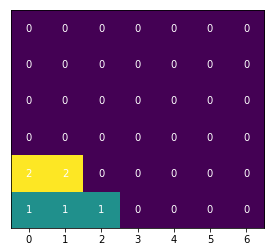

Player 2, pick a column!
2


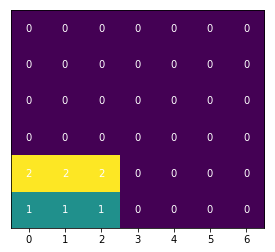

Player 1, pick a column!
3


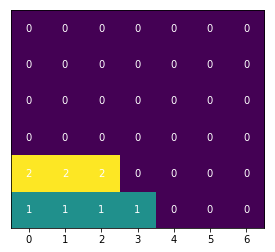

Player 1 wins!


In [231]:
board = np.zeros((6, 7), dtype = int)
playing = True
player_number = 1    
    
while playing:
    
    show_board(board)
    column = int(input('Player ' + str(player_number) + ', pick a column!\n'))
    board, row, dropped = drop_piece(board, column)
    
    if dropped:
        if four_in_a_row(board, row, column):
            playing = False
            show_board(board)
            print('Player ' + str(player_number) + ' wins!')        
        elif not (board == 0).any():
            playing = False
            show_board(board)
            print('Game over!')        
        player_number = 2 if player_number == 1 else 1     
    else:
        print('Sorry, that column is full. Try again!')


